In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [45]:
pathData = r"C:\data\udacity\airbnb_global\airbnb-listings.csv"

data = pd.read_csv(pathData, sep=";")

# drop raw from data where Country is 0 (corrupt dataset)
print(len(data))
data = data[data['Country'] != '0']
print(len(data))
data['Host Location'] = data['Host Location'].str.lower()

C:\Users\sce2rng\AppData\Local\Temp\ipykernel_12696\2677722771.py:3: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(pathData, sep=";")


494954
494953


In [46]:
def create_dummy_df(df, cat_cols, dummy_na = False):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    #
    no_categoricals = df.loc[:, ~df.columns.isin(cat_cols)] # der Tilde-Operator ~ verwendet wird, um die Bedingung umzukehren
    df_with_cat_cols = df.drop(df.columns[~df.columns.isin(cat_cols)], axis=1)
    columns = df_with_cat_cols.columns # get the columns in the right order
    
    
     # 1. + 2. + 3. + 4. + 5.
    new_df = pd.get_dummies(df, dummy_na=dummy_na, prefix=columns, drop_first=True) 
    
    return new_df

In [47]:
selData = data[['Price', 'Country', 'Latitude', 'Longitude', 'Review Scores Rating', 'Number of Reviews', 'Transit', 'Host Location', 'Property Type', 'Room Type', 'Square Feet', 'Guests Included']]
labels = selData['Price']

print(len(selData))
print(selData.dtypes)

494953
Price                   float64
Country                  object
Latitude                float64
Longitude               float64
Review Scores Rating    float64
Number of Reviews       float64
Transit                  object
Host Location            object
Property Type            object
Room Type                object
Square Feet             float64
Guests Included         float64
dtype: object


In [ ]:
print(f"Square Feet nans: {selData['Square Feet'].isna().sum()}")

#drop Square Feet column
selData = selData.drop('Square Feet', axis=1)

In [48]:
# switch Transit column to boolean column nan values are 0 and other values are 1
# assumption everything with no nan have a transit
TransitBool = ~selData['Transit'].isna()
selData["TransitBool"]= TransitBool.astype(int)
selData = selData.drop(columns=["Transit"])
print(selData.columns)



Index(['Price', 'Country', 'Latitude', 'Longitude', 'Review Scores Rating',
       'Number of Reviews', 'Host Location', 'Property Type', 'Room Type',
       'Square Feet', 'Guests Included', 'TransitBool'],
      dtype='object')


C:\Users\sce2rng\AppData\Local\Temp\ipykernel_12696\809372848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selData["TransitBool"]= TransitBool.astype(int)


In [49]:
catColumns = selData.select_dtypes(include=['object'])
catNames = catColumns.columns
catNames

Index(['Country', 'Host Location', 'Property Type', 'Room Type'], dtype='object')

In [50]:
countryCodeDict = {"cx":"christmas island", "nl":"netherlands", "us": "united states", "es": "spain", "fr": "france", "it": "italy", 
                   "gb": "united kingdom", "de": "germany", "au": "australia", "ca": "canada", "pt": "portugal", 
                   "gr": "greece", "be": "belgium", "at": "austria", "ch": "switzerland", "dk": "denmark", "se": "sweden", 
                   "no": "norway", "fi": "finland", "ie": "ireland", "nz": "new zealand", "lu": "luxembourg", "sg": "singapore", 
                   "hk": "hong kong", "jp": "japan", "kr": "south korea", "tw": "taiwan", "cn": "china", "br": "brazil", "mx": "mexico", 
                   "ar": "argentina", "cl": "chile", "co": "colombia", "pe": "peru", "za": "south africa",
                   'ua': 'ukraine', 'sk': 'slovakia', 'wa': 'western sahara', 'dj': 'djibouti', 'by': 'belarus', 
                    'is': 'iceland', 'zm': 'zambia', 'mq': 'martinique', 'bl': 'saint barthélemy', 'la': 'laos', 
                    'ec': 'ecuador', 'jo': 'jordan', 'nc': 'new caledonia', 'mt': 'malta', 'eg': 'egypt', 
                    'ro': 'romania', 'rw': 'rwanda', 'de': 'germany', 'ke': 'kenya', '伦敦': 'united kingdom', 
                    'mg': 'madagascar', 'ae': 'united arab emirates', '加州': "united states", 'hn': 'honduras', 
                    'cz': 'czech republic', 'md': 'moldova', 'nl': 'netherlands', 'do': 'dominican republic', 
                    'si': 'slovenia', 'ma': 'morocco', 'dk': 'denmark', 'cm': 'cameroon', 'xk': 'kosovo', 
                    'bg': 'bulgaria', 'pr': 'puerto rico', 've': 'venezuela', 'sp': 'spain', 'th': 'thailand', 
                    'cr': 'costa rica', 'uk': 'united kingdom', 'lb': 'lebanon', 'ru': 'russia', 'vn': 'vietnam', 
                    'pa': 'panama', 'rd': 'dominican republic', 'fr': 'france', 'rs': 'serbia', 'bt': 'bhutan', 
                    'ge': 'georgia', 'al': 'albania', 'in': 'india', 'lt': 'lithuania', 'ee': 'estonia', 
                    'tt': 'trinidad and tobago', 'ng': 'nigeria', 'eu': 'european union', 'am': 'armenia', 
                    'it': 'italy', 'gh': 'ghana', 'hu': 'hungary', 'cw': 'curaçao', 'gr': 'greece', 'dm': 'dominica', 
                    'tn': 'tunisia', 'uk': 'united kingdom', 'id': 'indonesia', 'tr': 'turkey', 
                    'vc': 'saint vincent and the grenadines', 'ph': 'philippines', 'bd': 'bangladesh', 'rm': 'rome', 
                    'ht': 'haiti', 'qa': 'qatar', 'pl': 'poland', 'bc': 'british columbia', '中国': 'china', 
                    'it': 'italy', 'gt': 'guatemala', 'dz': 'algeria', 'cy': 'cyprus', 'vg': 'united kingdom', 
                    'gp': 'guadeloupe', 'bj': 'benin', 'pf': 'french polynesia', 'la': 'laos', 'uy': 'uruguay', 
                    'je': 'jersey', 'sa': 'saudi arabia', 'hr': 'croatia', 'il': 'israel', 'im': 'isle of man', 
                    're': 'réunion', 'lk': 'sri lanka', 'lv': 'latvia', 'mc': 'monaco', 'bh': 'bahrain', 'jm': 'jamaica', 
                    'es': 'spain', 'aw': 'aruba', 'my': 'malaysia', 'uk': 'united kingdom', 
                    'vi': "united states", 'dc': "united states", 'tx': "united states", 'nj': "united states", 'ny': "united states",'as': "united states", 
                    'eu': 'european union', '香港': 'hong kong', 'ap': 'asia/pacific region'}

otherCountrys = {"sydney": "australia", "scotland": 'united kingdom', "england": 'united kingdom', "london": 'united kingdom', 
                "u.k.": "united kingdom", "u.s.": "united states", "uk":'united kingdom', "us": "united states", "canadá": "canada", 
                "mallorca": "spain", "españa": "spain", "roma": "italy", "italia": "italy", "paris": "france", "ny": "united states",
                "new york": "united states", "copenhagen": "denmark", "berlin": "germany", "mexico city": "mexico",
                "québec": "canada","quebec": "canada", "danmark": "denmark", "nederland": "netherlands", "nederlanden": "netherlands",
                "hongkong": "hong kong", "california": "united states", "texas": "united states", "florida": "united states",
                "香港中环堅尼地dao": "hong kong", "wales": "united kingdom", "venice beach": "united states", "venice": "italy",
                "dublin": "irland", "buenos aires": "argentina", "barcelona": "spain", "madrid": "spain", "lisbon": "portugal", 
                "londra": "united kingdom", "queensland": "australia", "victoria": "australia", "melbourne": "australia",
                "tel aviv": "israel", "espana": "spain", "korea": "south korea", "calviá": "spain", "ontario": "canada", 
                "中國香港": "hong kong", "brooklyn": "united states", "macau": "china", "shoreditch": 'united kingdom'}

restCountrys = ["brasil", "uzbekistan", "cuba", "fiji", "ethiopia", "south korea", "grece", "iraq", "yemen", "bahamas", "israel", "vanuatu", "vatican city", "luxemburg", "libya", "senegal", "istanbul"]



In [51]:
# replace host location with country code if it is in the dictionary
for key in countryCodeDict.keys():
    selData['Host Location'] = selData['Host Location'].replace(key, countryCodeDict[key])

# when one of the Values of the countryCodeDict is part of the Host Location, replace it with that value
for value in list(countryCodeDict.values()) + restCountrys:
    selData['Host Location'] = selData['Host Location'].replace({f'.*{value}.*': value}, regex=True)

# replace other parts
for key in otherCountrys.keys():
    selData['Host Location'] = selData['Host Location'].replace({f'.*{key}.*': otherCountrys[key]}, regex=True)

# replace Host location with 2 "," with the part after the last ","
selData['Host Location'] = selData['Host Location'].apply(lambda x: str(x).split(',')[-1] if str(x).count(',') == 2 else x)


print(selData['Host Location'].value_counts())

united states             203435
united kingdom             59789
france                     55449
spain                      42926
italy                      32643
                           ...  
santa monica mountains         1
 2100 københavn ø              1
sw19 3de                       1
 edinburgh                     1
herman triers plads            1
Name: Host Location, Length: 938, dtype: int64


In [52]:
foundCountrys = list(set(list(countryCodeDict.values()) + list(otherCountrys.values()) + restCountrys))
seriesHostLocation = selData["Host Location"] 
#notInDict = [location for location in seriesHostLocation if location not in foundCountrys]
# delet all rows in data where the host location is not in the foundCountrys
cleanHlData = selData[selData['Host Location'].isin(foundCountrys)]
print(f"lost rows: {len(features) - len(cleanHlData)}")
print(f"Number of different Host Locations {len(cleanHlData['Host Location'].value_counts())}")
print(cleanHlData['Host Location'].value_counts())

lost rows: -4157
Number of different Host Locations 126
united states       203435
united kingdom       59789
france               55449
spain                42926
italy                32643
                     ...  
fiji                     1
saint barthélemy         1
bhutan                   1
vatican city             1
benin                    1
Name: Host Location, Length: 126, dtype: int64


In [53]:
dummySet = create_dummy_df(cleanHlData, catNames)
print(len(dummySet.columns))
display(dummySet.head(5))

199


,Price,Latitude,Longitude,Review Scores Rating,Number of Reviews,Square Feet,Guests Included,TransitBool,Country_Austria,Country_Belgium,...,Property Type_Tipi,Property Type_Townhouse,Property Type_Train,Property Type_Treehouse,Property Type_Vacation home,Property Type_Van,Property Type_Villa,Property Type_Yurt,Room Type_Private room,Room Type_Shared room
0,600.0,52.365237,4.878250,89.0,31.0,NaN,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,175.0,52.367309,4.873841,99.0,15.0,NaN,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,125.0,52.361944,4.866687,100.0,1.0,NaN,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,130.0,52.370146,4.866282,97.0,22.0,NaN,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80.0,52.368818,4.871249,78.0,16.0,NaN,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
dummySet.columns

Index(['Price', 'Latitude', 'Longitude', 'Review Scores Rating',
       'Number of Reviews', 'Square Feet', 'Guests Included', 'TransitBool',
       'Country_Austria', 'Country_Belgium',
       ...
       'Property Type_Tipi', 'Property Type_Townhouse', 'Property Type_Train',
       'Property Type_Treehouse', 'Property Type_Vacation home',
       'Property Type_Van', 'Property Type_Villa', 'Property Type_Yurt',
       'Room Type_Private room', 'Room Type_Shared room'],
      dtype='object', length=199)

In [55]:
fill_mean = lambda col: col.fillna(col.mean()) # calculate the mean of the column and fill the missing values
fill_mode = lambda col: col.fillna(col.mode())  # get the most common value of the column and fill the missing values

491152
10731


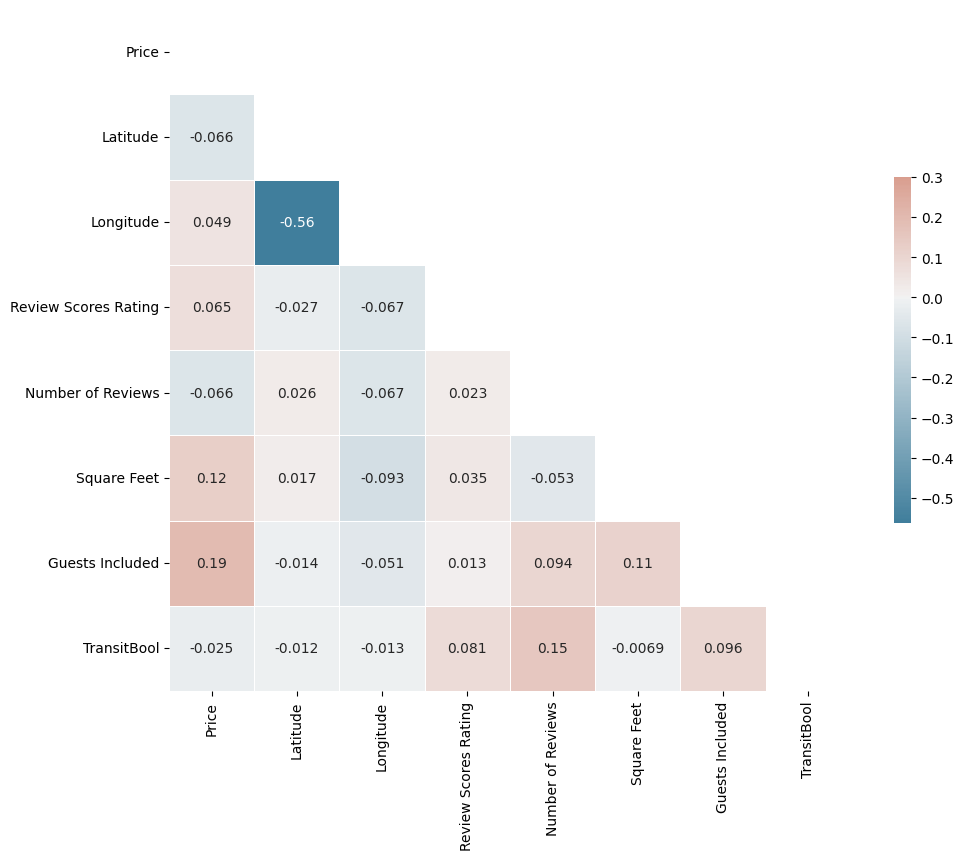

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Compute the correlation matrix
correlation_matrix = cleanHlData.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Correlation between Price and Review Scores Rating without rows with nan values: 0.06451773476937629


491152
10731


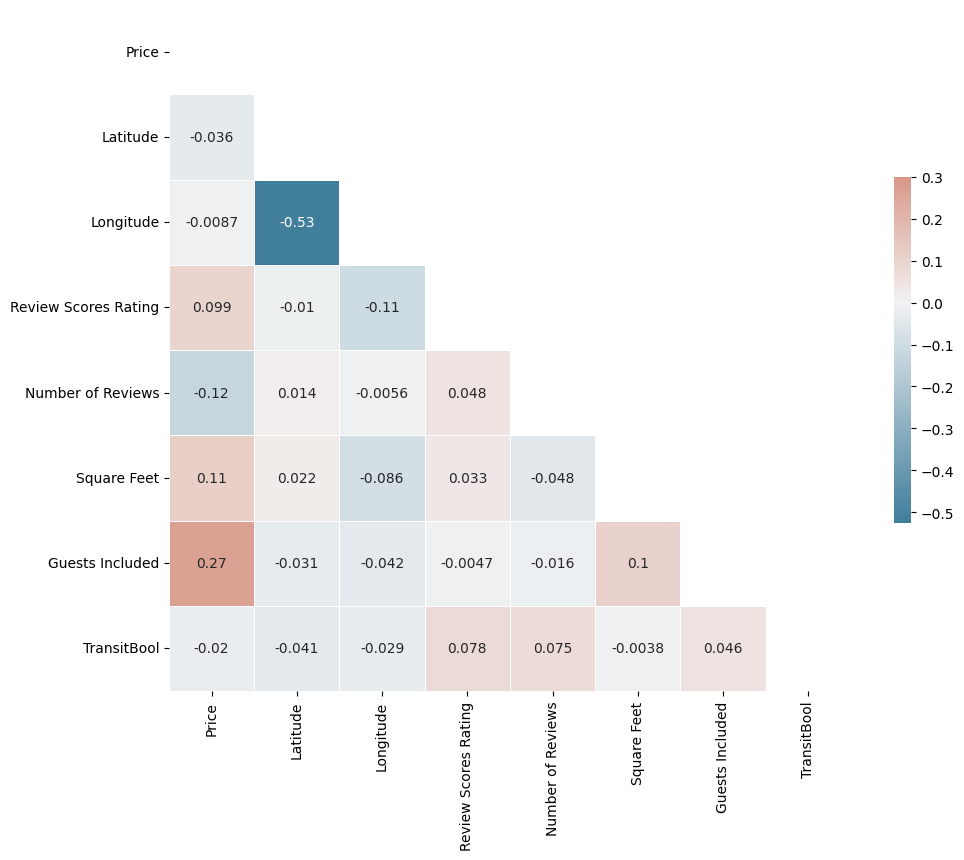

In [64]:
# delet all rows where nan are in
print(len(cleanHlData))
noNanData = cleanHlData.dropna()
print(len(noNanData))

# Compute the correlation matrix
correlation_matrix = noNanData.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Price nans: 7847
Latitude nans: 1
Longitude nans: 1
Review Scores Rating nans: 126190
Number of Reviews nans: 1
Square Feet nans: 479000
Guests Included nans: 1
Host Location nans: 0
Property Type nans: 11
Room Type nans: 1
Country nans: 3


In [56]:
X = cleanHlData[[ 'Country', 'Latitude', 'Longitude', 'Review Scores Rating', 'Number of Reviews', 'TransitBool', 'Host Location', 'Property Type', 'Room Type', 'Square Feet', 'Guests Included']]
y = cleanHlData['Price']
#X = df_dropna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
#y = df_dropna['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'